In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1. Take a bunch of board pictures with different piece configurations
2. Take squares out of the images and save them into folders of different categories - e.g. black, blue, red, etc...
3. Take a subset of these and put them into a test folder, the rest in a train folder
4. Try out the classfiers on the training example - testing on the test set  - do they work?
5. Now that you know it works, then try it from the beginning
    1. loading a big image, slicing into squares
    2. using the trained classifier to predict the new squares
    3. convert the result to a Game simulator board

## Take a bunch of board pictures with different piece configurations

In [6]:
board_size=(4,4)

In [16]:
def list_files(startpath,ignore=[]):
    import os

    
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            if f in ignore:
                continue
            
            print('{}{}'.format(subindent, f))

In [7]:
def read_image(fname):
    arr=imread(fname)
    print("Min and Max",arr.min(),arr.max())    
    
    if any(arr>1):  # if the image is read in as uint8, it's not 0-1 but 0-255, so scale it down
        print("Min and Max",arr.min(),arr.max())
        print("Scaling it down....")
        arr=arr/255
        print("Min and Max",arr.min(),arr.max())    
        
    if len(arr.shape)>2 and arr.shape[2]>3:  # alpha channel
        print("arr shape",arr.shape)
        print("Removing alpha channel")
        arr=arr[:,:,:3]
        print("new arr shape",arr.shape)
        
        
    arr=arr[30:260,45:310]  # change this for your image
    
    return arr

In [8]:
def get_square(arr,Nr,Nc,r,c,percent=100):
    image_rows,image_cols=arr.shape[:2]
    square_row=int(image_rows/Nr)
    square_col=int(image_cols/Nc)
    
    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)
    
    if percent==100:
        square=arr[start_row:end_row,start_col:end_col]
        
    else:
        dc=int((end_col-start_col)*(100-percent)/2.0/100.0)
        dr=int((end_row-start_row)*(100-percent)/2.0/100.0)

        square=arr[start_row+dr:end_row-dr,start_col+dc:end_col-dc]
        
        
    return square

Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314


Text(0.5,1,'Image Size: 230,265')

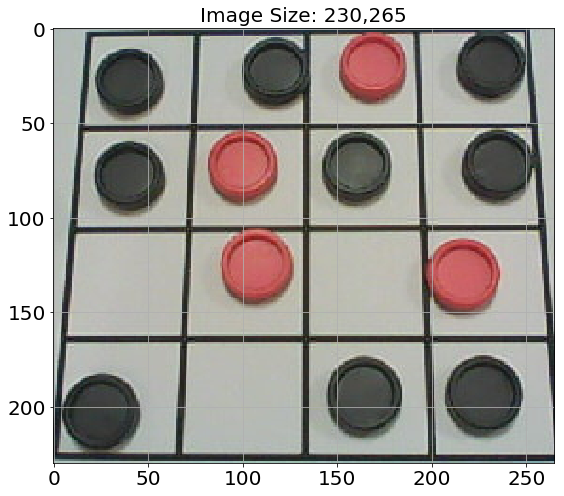

In [100]:
fname='robot images/test9.jpg'
count=1
arr=read_image(fname)
imshow(arr)
title('Image Size: %d,%d' % (arr.shape[0],arr.shape[1]))

## Take squares out of the images and save them into folders of different categories - e.g. black, blue, red, etc...

I find that trimming by 50% or so gives better performance.

In [143]:
percent_trim=50

### WARNING - looks like you want to save your data as png otherwise the size of the vectors can change ####

In [145]:
arr=rand(57,66,3)
imsave('test.jpg',arr)
imsave('test.png',arr)

arr=imread('test.png')
print(arr.shape)

arr=imread('test.jpg')
print(arr.shape)

(57, 66, 4)
(56, 66, 3)


Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314
saving  piece0.png shape  (29, 34, 3)
saving  piece1.png shape  (29, 34, 3)
saving  piece2.png shape  (29, 34, 3)
saving  piece3.png shape  (29, 34, 3)
saving  piece4.png shape  (29, 34, 3)
saving  piece5.png shape  (29, 34, 3)
saving  piece6.png shape  (29, 34, 3)
saving  piece7.png shape  (29, 34, 3)
saving  piece8.png shape  (29, 34, 3)
saving  piece9.png shape  (29, 34, 3)
saving  piece10.png shape  (29, 34, 3)
saving  piece11.png shape  (29, 34, 3)
saving  piece12.png shape  (29, 34, 3)
saving  piece13.png shape  (29, 34, 3)
saving  piece14.png shape  (29, 34, 3)
saving  piece15.png shape  (29, 34, 3)


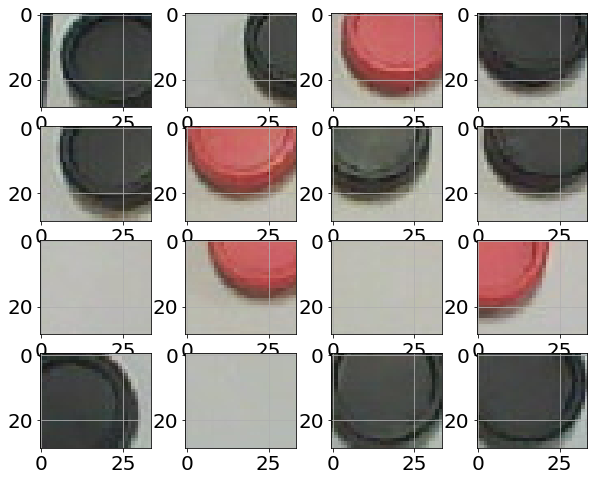

In [146]:
fname='robot images/test9.jpg'
count=0
arr=read_image(fname)
for r in range(4):
    for c in range(4):
        subplot(4,4,count+1)
        small_square=get_square(arr,board_size[0],board_size[1],r,c,percent_trim)
        
        imshow(small_square)
        
        sfname='piece%d.png' % count
        imsave(sfname,small_square)
        print("saving ",sfname, "shape ",small_square.shape)
        count+=1

### want to do more than one image?

In [148]:
filenames=['robot images/test0.jpg',
           'robot images/test1.jpg',
           'robot images/test2.jpg',
           'robot images/test4.jpg',
           'robot images/test5.jpg',
           'robot images/test6.jpg',
           'robot images/test7.jpg',
           'robot images/test10.jpg',
          ]
count=0
for fname in filenames:
    arr=read_image(fname)
    for r in range(4):
        for c in range(4):
            #subplot(4,4,count+1)
            small_square=get_square(arr,board_size[0],board_size[1],r,c,percent_trim)
            #imshow(small_square)
            sfname='piece%d.png' % count
            imsave(sfname,small_square)
            print("saving ",sfname, "shape ",small_square.shape)
            count+=1
            
            
square_shape=small_square.shape

Min and Max 2 230
Min and Max 2 230
Scaling it down....
Min and Max 0.00784313725490196 0.9019607843137255
saving  piece0.png shape  (29, 34, 3)
saving  piece1.png shape  (29, 34, 3)
saving  piece2.png shape  (29, 34, 3)
saving  piece3.png shape  (29, 34, 3)
saving  piece4.png shape  (29, 34, 3)
saving  piece5.png shape  (29, 34, 3)
saving  piece6.png shape  (29, 34, 3)
saving  piece7.png shape  (29, 34, 3)
saving  piece8.png shape  (29, 34, 3)
saving  piece9.png shape  (29, 34, 3)
saving  piece10.png shape  (29, 34, 3)
saving  piece11.png shape  (29, 34, 3)
saving  piece12.png shape  (29, 34, 3)
saving  piece13.png shape  (29, 34, 3)
saving  piece14.png shape  (29, 34, 3)
saving  piece15.png shape  (29, 34, 3)
Min and Max 2 238
Min and Max 2 238
Scaling it down....
Min and Max 0.00784313725490196 0.9333333333333333
saving  piece16.png shape  (29, 34, 3)
saving  piece17.png shape  (29, 34, 3)
saving  piece18.png shape  (29, 34, 3)
saving  piece19.png shape  (29, 34, 3)
saving  piece20.

# Take a subset of these and put them into a test folder, the rest in a train folder

Notice that none of the images in the test set are also in the training set.

In [149]:
list_files('train_pieces',ignore=[".DS_Store"])

train_pieces/
    black/
        piece100.png
        piece101.png
        piece102.png
        piece103.png
        piece104.png
        piece105.png
        piece106.png
        piece107.png
        piece108.png
        piece109.png
        piece110.png
        piece111.png
        piece77.png
        piece78.png
        piece79.png
        piece80.png
        piece81.png
        piece82.png
        piece83.png
        piece84.png
        piece85.png
        piece86.png
        piece87.png
        piece88.png
        piece89.png
        piece90.png
        piece91.png
        piece92.png
        piece93.png
        piece94.png
        piece95.png
        piece96.png
        piece97.png
        piece98.png
        piece99.png
    red/
        piece14.png
        piece15.png
        piece16.png
        piece17.png
        piece18.png
        piece19.png
        piece20.png
        piece21.png
        piece22.png
        piece23.png
        piece24.png
        piece25.png
        piece2

In [150]:
list_files('test_pieces',ignore=[".DS_Store"])

test_pieces/
    black/
        piece64.png
        piece65.png
        piece66.png
        piece67.png
        piece68.png
        piece69.png
        piece70.png
        piece71.png
        piece72.png
        piece73.png
        piece74.png
        piece75.png
        piece76.png
    red/
        piece0.png
        piece1.png
        piece10.png
        piece11.png
        piece12.png
        piece13.png
        piece2.png
        piece3.png
        piece4.png
        piece5.png
        piece6.png
        piece7.png
        piece8.png
        piece9.png
    white/
        piece48.png
        piece49.png
        piece50.png
        piece51.png
        piece52.png
        piece53.png
        piece54.png
        piece55.png
        piece56.png
        piece57.png
        piece58.png


# Try out the classfiers on the training example - testing on the test set  - do they work?

In [151]:
from classy import *

In [152]:
images_train=image.load_images('train_pieces')
summary(images_train)

images_test=image.load_images('test_pieces')
summary(images_test)


[black]: 35 files found
[red]: 34 files found
[white]: 21 files found
Images
90 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
[black]: 13 files found
[red]: 14 files found
[white]: 11 files found
Images
38 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'


In [162]:
images_train.data[0].shape

(29, 34, 3)

In [153]:
data_train=image.images_to_vectors(images_train)
if any(data_train.vectors>1):
    print("\nScaling down...")
    data_train.vectors/=255.0
    summary(data_train)
    


data_test=image.images_to_vectors(images_test)
if any(data_test.vectors>1):
    print("\nScaling down...")
    data_test.vectors/=255.0
    summary(data_train)
summary(data_test)
    
    
    
data_train,data_test=remap_targets(data_train,data_test,
            ['white','red','black'])  # make sure the targets match


90 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [145.21111111 129.32222222 123.92222222 ... 175.33333333 174.18888889
 166.8       ]
Median:  [178.  118.  118.5 ... 183.  188.  179.5]
Stddev:  [55.71026126 57.40302504 55.44491316 ... 26.96829414 37.64863711
 36.07867945]

Scaling down...
90 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.56945534 0.50714597 0.4859695  ... 0.6875817  0.68309368 0.65411765]
Median:  [0.69803922 0.4627451  0.46470588 ... 0.71764706 0.7372549  0.70392157]
Stddev:  [0.21847161 0.2251099  0.21743103 ... 0.10575802 0.14764171 0.14148502]
38 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p29

In [154]:
C=NaiveBayes()
# or...
#C=kNearestNeighbor()
#C=CSC()

In [155]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.005234956741333008 seconds ')


In [156]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 97.36842105263158


### What do the prototypes look like?

In [157]:
C.means.shape

(3, 2958)

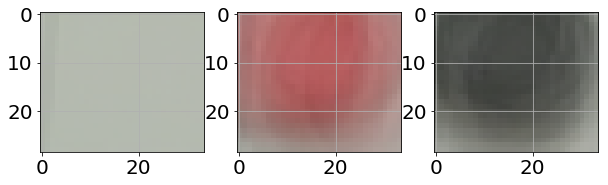

In [163]:
square_shape=images_train.data[0].shape
subplot(1,3,1)
im=image.vector_to_image(C.means[0],square_shape)

subplot(1,3,2)
im=image.vector_to_image(C.means[1],square_shape)

subplot(1,3,3)
im=image.vector_to_image(C.means[2],square_shape)


## Now that you know it works, then try it from the beginning

### training with all of the examples

In [167]:
images_train=image.load_images('train_pieces')
summary(images_train)

images_test=image.load_images('test_pieces')
summary(images_test)


[black]: 35 files found
[red]: 34 files found
[white]: 21 files found
Images
90 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
[black]: 13 files found
[red]: 14 files found
[white]: 11 files found
Images
38 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'


In [ ]:
data_train=image.images_to_vectors(images_train)
if any(data_train.vectors>1):
    print("\nScaling down...")
    data_train.vectors/=255.0
    summary(data_train)
    


data_test=image.images_to_vectors(images_test)
if any(data_test.vectors>1):
    print("\nScaling down...")
    data_test.vectors/=255.0
    summary(data_train)
summary(data_test)
    
    

### loading a big image, slicing into squares

In [164]:
from classy.image import array_to_image_struct

Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314
16 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'
Mean:  [0.55906863 0.53333333 0.51176471 ... 0.67328431 0.67892157 0.65171569]
Median:  [0.69019608 0.66666667 0.65098039 ... 0.73333333 0.7372549  0.70980392]
Stddev:  [0.21254381 0.20976269 0.2076303  ... 0.15108679 0.16394476 0.16307089]


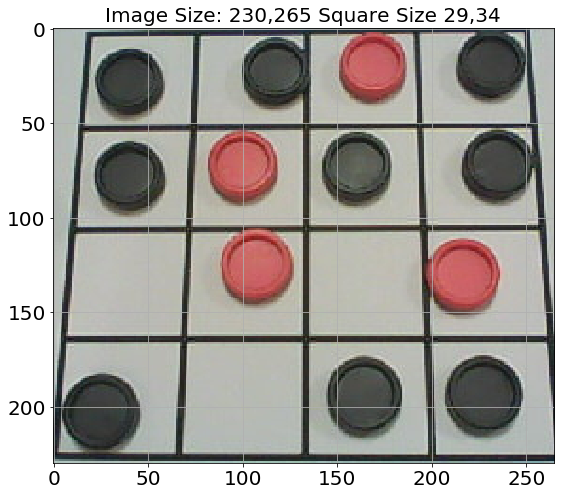

In [165]:
fname='robot images/test9.jpg'
count=1
arr=read_image(fname)
imshow(arr)
squares=[]
for r in range(4):
    for c in range(4):
        square=get_square(arr,board_size[0],board_size[1],r,c)
        
        small_square=get_square(arr,board_size[0],board_size[1],r,c,percent_trim)
        
        squares.append(small_square)
        count+=1
    
title('Image Size: %d,%d Square Size %d,%d' % (arr.shape[0],arr.shape[1],
                                         small_square.shape[0],
                                         small_square.shape[1],
                                         ))

square_images=array_to_image_struct(squares)
square_data=image.images_to_vectors(square_images)


 2  1  1  2 
 2  1  2  2 
 0  1  0  1 
 2  0  2  2 



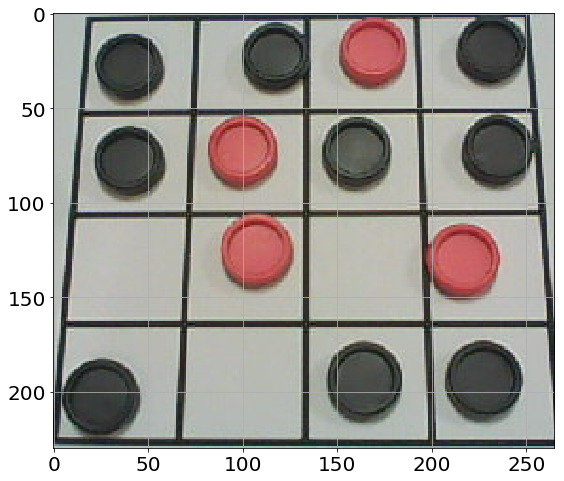

In [166]:
from Game import *

state=Board(4,4)
state.board=C.predict(square_data.vectors)
print(state)
imshow(arr)